In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata

In [ ]:
df = pd.read_csv('/content/startup_funding (1).csv')

In [ ]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
df.drop(['Remarks'], axis=1,inplace=True)

In [ ]:
def extract_name(url_or_name):
    if url_or_name.startswith('https://www.'):
        return url_or_name.split('.')[1].capitalize()
    return url_or_name

df['Startup Name'] = df['Startup Name'].apply(extract_name)

In [ ]:
df['Startup Name'] = df['Startup Name'].str.replace(r'\.in$', '', regex=True).str.capitalize()

In [ ]:
df['Startup Name'] = df['Startup Name'].str.replace(r'\.com$', '', regex=True).str.capitalize()

In [ ]:
df['Startup Name'] = df['Startup Name'].str.replace(r'\.ai$', '', regex=True).str.capitalize()

In [ ]:
df['Startup Name'] = df['Startup Name'].str.replace(r'\.me$', '', regex=True).str.capitalize()

In [ ]:
df['Startup Name'] = df['Startup Name'].str.replace(r'\.io$', '', regex=True).str.capitalize()

In [ ]:
df['Startup Name'] = df['Startup Name'].str.replace(r'\.IO$', '', regex=True).str.capitalize()

In [ ]:
df = df.applymap(lambda x: str(x).replace(r'\\xc2\\xa0', ''))

In [ ]:
df = df.applymap(lambda x: str(x).replace(r'\\xe2\\x80\\x99s', ''))

In [ ]:
df = df.applymap(lambda x: str(x).replace(r'\\n', ''))

In [ ]:
df['year'] =pd.to_datetime(df['Date dd/mm/yyyy'], errors='coerce').dt.year

<ipython-input-15-18a77083e01b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['year'] =pd.to_datetime(df['Date dd/mm/yyyy'], errors='coerce').dt.year


In [ ]:
df = df[~df['Amount in USD'].isin(['Undisclosed', 'Unknown', 'undisclosed', 'unknown', 'N/A'])]

In [ ]:
df['Amount in USD'] = df['Amount in USD'].str.replace('+', '')

<ipython-input-17-24aed990cad2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Amount in USD'] = df['Amount in USD'].str.replace('+', '')
<ipython-input-17-24aed990cad2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount in USD'] = df['Amount in USD'].str.replace('+', '')


In [ ]:
df['Amount in USD'] = df['Amount in USD'].str.replace(',', '')

<ipython-input-18-98ed2e2a3d51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount in USD'] = df['Amount in USD'].str.replace(',', '')


In [ ]:
df['Date dd/mm/yyyy'].replace("05/072018", "05/07/2018", inplace=True)

<ipython-input-19-a7c1abecc512>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date dd/mm/yyyy'].replace("05/072018", "05/07/2018", inplace=True)


In [ ]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,year
0,1,09/01/2020,Byju’s,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,2020.0
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,2020.0
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,2020.0
3,4,02/01/2020,Wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,2020.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,2020.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3033 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr No              3033 non-null   object 
 1   Date dd/mm/yyyy    3033 non-null   object 
 2   Startup Name       3033 non-null   object 
 3   Industry Vertical  3033 non-null   object 
 4   SubVertical        3033 non-null   object 
 5   City  Location     3033 non-null   object 
 6   Investors Name     3033 non-null   object 
 7   InvestmentnType    3033 non-null   object 
 8   Amount in USD      3033 non-null   object 
 9   year               3030 non-null   float64
dtypes: float64(1), object(9)
memory usage: 260.6+ KB


In [ ]:
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], errors='coerce')

<ipython-input-22-521e6ac4ee59>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], errors='coerce')
<ipython-input-22-521e6ac4ee59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], errors='coerce')


In [ ]:
df.dropna(subset=['Amount in USD'], inplace=True)

<ipython-input-23-3d593ebfcc68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Amount in USD'], inplace=True)


In [ ]:
df.dropna(subset=['Investors Name'], inplace=True)

<ipython-input-24-a58eae62fd9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Investors Name'], inplace=True)


In [ ]:
df['Investors Name'] = df['Investors Name'].str.split(', ')
df = df.explode('Investors Name')

In [ ]:
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,year
0,1,2020-09-01,Byju’s,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,2020.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,2020.0
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,2020.0
3,4,2020-02-01,Wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,2020.0
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,2020.0
...,...,...,...,...,...,...,...,...,...,...
3040,3041,2015-01-29,Graphene,nan,nan,nan,KARSEMVEN Fund,Private Equity,825000,2015.0
3041,3042,2015-01-30,Mad street den,nan,nan,nan,Exfinity Fund,Private Equity,1500000,2015.0
3041,3042,2015-01-30,Mad street den,nan,nan,nan,GrowX Ventures.,Private Equity,1500000,2015.0
3042,3043,2015-01-30,Simplotel,nan,nan,nan,MakeMyTrip,Private Equity,nan,2015.0


In [ ]:
df = df[~df['year'].isin(['Undisclosed', 'Unknown', 'undisclosed', 'unknown', 'N/A'])]

In [ ]:
df = df[~df['City  Location'].isin(['Undisclosed', 'Unknown', 'undisclosed', 'unknown', 'N/A', 'nan'])]

In [ ]:
df = df[~df['InvestmentnType'].isin(['Undisclosed', 'Unknown', 'undisclosed', 'unknown', 'N/A', 'nan'])]

In [ ]:
df['InvestmentnType'] = df['InvestmentnType'].str.split('/ ')
df = df.explode('InvestmentnType')

In [ ]:
df['InvestmentnType'] = df['InvestmentnType'].str.split('/')
df = df.explode('InvestmentnType')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5628 entries, 0 to 2872
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              5628 non-null   object        
 1   Date dd/mm/yyyy    5626 non-null   datetime64[ns]
 2   Startup Name       5628 non-null   object        
 3   Industry Vertical  5628 non-null   object        
 4   SubVertical        5628 non-null   object        
 5   City  Location     5628 non-null   object        
 6   Investors Name     5628 non-null   object        
 7   InvestmentnType    5628 non-null   object        
 8   Amount in USD      5628 non-null   object        
 9   year               5622 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 483.7+ KB


In [ ]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,year
0,1,2020-09-01,Byju’s,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,2020.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,2020.0
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,2020.0
3,4,2020-02-01,Wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,2020.0
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,2020.0


In [ ]:
df['Amount in USD'] = df['Amount in USD'].astype(float)

In [ ]:
# Calculate total number of fundings done in each year
yearly_fundings = df['year'].value_counts().sort_index()

In [ ]:
yearly_fundings

2015.0    1444
2016.0    1856
2017.0    1366
2018.0     786
2019.0     163
2020.0       7
Name: year, dtype: int64

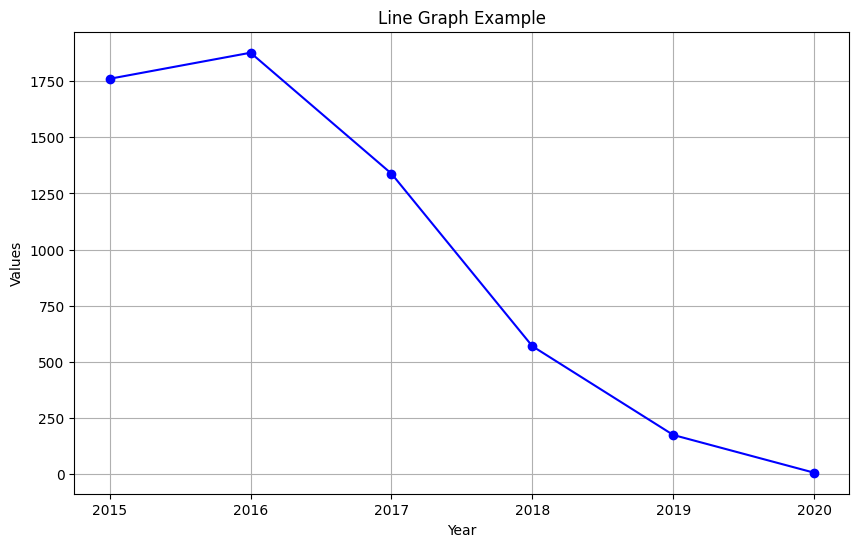

In [ ]:
# Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

years = [2015, 2016, 2017, 2018, 2019, 2020]
values = [1760, 1876, 1338, 570, 175, 7]

# Create the line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(years, values, marker='o', linestyle='-', color='b')
plt.title('Line Graph Example')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(True)

# Display the plot
plt.show()

From the above graph we see that fundings have decreased over the years.
Maximum funding was done by the investors in the year 2016 and least in 2020. From the above trend we can say that the number of startups over the year are decreasing and hence insvestment/fundings are decreased.

In [ ]:
df['City  Location'] = df['City  Location'].str.split('/ ')
df = df.explode('City  Location')

In [ ]:
df['City  Location'] = df['City  Location'].str.split(', ')
df = df.explode('City  Location')

In [ ]:
df['City  Location'] = df['City  Location'].str.split('/')
df = df.explode('City  Location')

In [ ]:
df.dropna(subset=['City  Location'], inplace=True)

In [ ]:
df['City  Location'] = df['City  Location'].str.replace('New Delhi', 'Delhi')

In [ ]:
df['City  Location'] = df['City  Location'].str.replace('Delhi', 'New Delhi')

In [ ]:
df['City  Location'] = df['City  Location'].str.replace('bangalore', 'Bangalore')

In [ ]:
df['City  Location'] = df['City  Location'].str.replace('Bengaluru', 'Bangalore')

In [ ]:
df['City  Location'] = df['City  Location'].str.replace('Bangkok', 'Bangalore')

In [ ]:
df['City  Location'] = df['City  Location'].str.replace('SFO', 'Bangalore')

In [ ]:
df['City  Location'] = df['City  Location'].str.replace('Singapore', 'India')

In [ ]:
df['City  Location'] = df['City  Location'].str.replace('New York', 'Bangalore')

In [ ]:
df['City  Location'] = df['City  Location'].str.replace('US', 'India')

In [ ]:
city_startup_counts = df.groupby('City  Location')['Startup Name'].value_counts().sort_index()

In [ ]:
city_startup_counts

City  Location  Startup Name
Agra            Shoekonnect     2
Ahemadabad      Enakshi         2
                Infibeam        1
Ahemdabad       Foodmemories    4
Ahmedabad       Airmed labs     1
                               ..
Vadodara        Oibanit         2
                Oneway.cab      1
                Pastiwala       1
                Purpledocs      2
Varanasi        Dawailelo       1
Name: Startup Name, Length: 2337, dtype: int64

In [ ]:
top_10_cities = city_startup_counts.sort_values(ascending=False)[:10]
top_10_cities

City  Location  Startup Name
Mumbai          Fynd            25
Bangalore       Medinfi         20
                Blackbuck       20
                Swiggy          19
                Zilingo         18
Mumbai          Elemential      18
Bangalore       Healthifyme     15
                Sigtuple        15
                Curefit         15
Mumbai          Nykaa           14
Name: Startup Name, dtype: int64

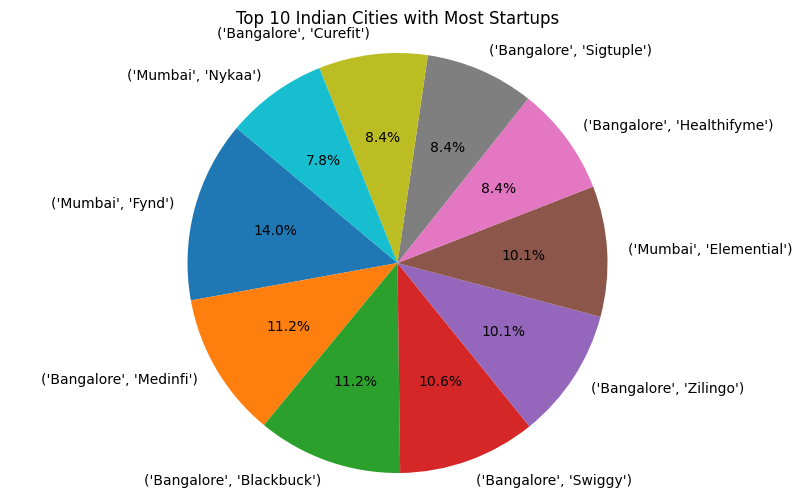

('Mumbai', 'Fynd'): 25
('Bangalore', 'Medinfi'): 20
('Bangalore', 'Blackbuck'): 20
('Bangalore', 'Swiggy'): 19
('Bangalore', 'Zilingo'): 18
('Mumbai', 'Elemential'): 18
('Bangalore', 'Healthifyme'): 15
('Bangalore', 'Sigtuple'): 15
('Bangalore', 'Curefit'): 15
('Mumbai', 'Nykaa'): 14


In [ ]:
# Plotting a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_10_cities, labels=top_10_cities.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Indian Cities with Most Startups')
plt.axis('equal')
plt.show()

# Print city names and startup counts
for city, startups in top_10_cities.items():
    print(f"{city}: {startups}")

In [ ]:
city_startup_counts1 = df.groupby('Startup Name')['City  Location'].value_counts().sort_index()
city_startup_counts1

Startup Name        City  Location
"byju\\'s"          Bangalore          1
121policy           Kolkata            1
19th mile           Gurugram          10
1crowd              Mumbai             1
1mg                 Gurgaon            8
                                      ..
infinity assurance  New Delhi          1
loylty rewards      Mumbai             1
mamagoto            New Delhi          1
news in shorts      Noida              1
nudgespot           Bangalore          4
Name: City  Location, Length: 2337, dtype: int64

In [ ]:
city_startup_counts1 = df['City  Location'].value_counts().sort_index()
city_startup_counts1

Agra              2
Ahemadabad        3
Ahemdabad         4
Ahmedabad        70
Amritsar          1
                 ..
Udaipur           5
Udupi             3
Uttar Pradesh     1
Vadodara         18
Varanasi          1
Name: City  Location, Length: 85, dtype: int64

In [ ]:
top_10_cities1 = city_startup_counts1.sort_values(ascending=False)[:10]
top_10_cities1

Bangalore    1799
Mumbai       1156
New Delhi     862
Gurgaon       551
Hyderabad     189
Pune          187
Noida         179
Chennai       166
Gurugram      127
Ahmedabad      70
Name: City  Location, dtype: int64

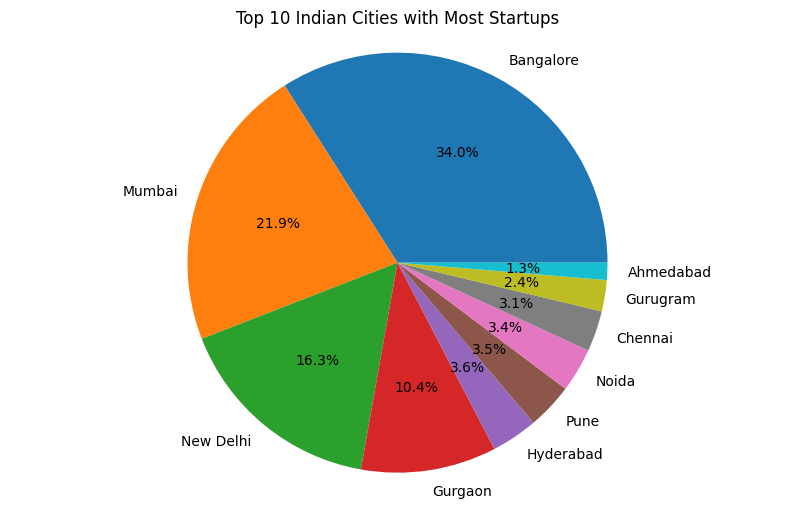

Bangalore: 1799
Mumbai: 1156
New Delhi: 862
Gurgaon: 551
Hyderabad: 189
Pune: 187
Noida: 179
Chennai: 166
Gurugram: 127
Ahmedabad: 70


In [ ]:
# Plotting a pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_10_cities1, labels=top_10_cities1.index, autopct='%1.1f%%')
plt.title('Top 10 Indian Cities with Most Startups')
plt.axis('equal')
plt.show()

# Print city names and startup counts
for city, startups in top_10_cities1.items():
    print(f"{city}: {startups}")

From above pie chart we can see that maximum number of startups are Banglore based followed by Mumbai and New Delhi.

# Q
Find out if cities play any role in receiving funding.
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city
has got (among top 10 Indian cities only).
Print the city and percentage with 2 decimal place after rounding off.

In [ ]:
city_funding = df.groupby('City  Location')['Amount in USD'].sum()

# Find the top 10 cities with the most funding
top_10_cities = city_funding.nlargest(10)

# Calculate the total funding among top 10 cities
total_funding_top_10 = top_10_cities.sum()

# Calculate the percentage of funding for each city
city_percentage = (top_10_cities / total_funding_top_10) * 100

# Print city and percentage with 2 decimal places
for city, percentage in city_percentage.items():
    print(f"{city}: {percentage:.2f}%")

Bangalore: 50.68%
Mumbai: 14.16%
New Delhi: 10.80%
Gurgaon: 10.46%
India: 3.95%
Pune: 2.34%
Chennai: 2.19%
Noida: 2.11%
Gurugram: 2.06%
Kormangala: 1.25%


Banglore based startups have recieved maximum fundings which is 50% of the total fundings recieved to the startups. From this we can say that cities play important role to recieve fundings.

#Q
There are 4 different type of investments. Find out percentage of amount funded for each investment
type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

In [ ]:
df['InvestmentnType'] = df['InvestmentnType'].str.replace('PrivateEquity', 'Private Equity')

In [ ]:
df['InvestmentnType'] = df['InvestmentnType'].str.replace('Private Equity Round', 'Private Equity')

In [ ]:
df['InvestmentnType'] = df['InvestmentnType'].str.replace('Seed Funding Funding', 'Seed Funding')

In [ ]:
df['InvestmentnType'] = df['InvestmentnType'].str.replace('Seed Funding Round', 'Seed Funding')

In [ ]:
df['InvestmentnType'] = df['InvestmentnType'].str.replace('Seed Funding ', 'Seed Funding')

In [ ]:
df['InvestmentnType'] = df['InvestmentnType'].str.replace('Private Equity Equity', 'Private Equity')

In [ ]:
df['InvestmentnType'] = df['InvestmentnType'].str.replace('Private', 'Private Equity')

In [ ]:
df['InvestmentnType'] = df['InvestmentnType'].str.replace('Debt', 'Debt Funding')

In [ ]:
df['InvestmentnType'] = df['InvestmentnType'].str.replace('Debt Funding Funding', 'Debt Funding')

In [ ]:
df['InvestmentnType'] = df['InvestmentnType'].str.replace('Debt Funding-Funding', 'Debt Funding')

In [ ]:
# Drop rows with NaN values in the 'Amount in USD' column
df.dropna(subset=['Amount in USD'], inplace=True)

# Group by investment type and sum up the funding amounts
investment_funding = df.groupby('InvestmentnType')['Amount in USD'].sum()

# Calculate the total funding across all investment types
total_funding = investment_funding.sum()

# Calculate the percentage of funding for each investment type
investment_percentage = (investment_funding / total_funding) * 100


# Print investment type and percentage with 2 decimal places
for investment_type, percentage in investment_percentage.items():
    print(f"{investment_type}: {percentage:.2f}%")

Angel: 0.00%
Angel : 0.00%
Angel Funding: 0.30%
Angel Round: 0.00%
Angle Funding: 0.14%
Corporate Round: 0.05%
Debt Funding: 0.32%
Debt Funding and Preference capital: 0.01%
Equity: 0.14%
Equity Based Funding: 0.04%
Funding Round: 1.38%
Inhouse Funding: 0.00%
Maiden Round: 0.01%
Mezzanine: 0.00%
Pre-Series A: 0.01%
Pre-series A: 0.00%
Private Equity: 0.02%
Private Equity Equity: 77.08%
Private Equity Funding: 0.02%
Seed: 0.38%
Seed : 0.21%
Seed Funding: 1.24%
Seed Round: 0.27%
Series A: 0.47%
Series B: 7.64%
Series B (Extension): 0.04%
Series C: 2.04%
Series D: 6.48%
Series E: 0.05%
Series F: 0.15%
Series G: 0.32%
Series H: 0.62%
Series J: 0.00%
Single Venture: 0.39%
Structured Debt Funding: 0.01%
Term Loan: 0.01%
Venture - Series Unknown: 0.00%
Venture Round: 0.03%
pre-Series A: 0.08%
pre-series A: 0.01%


Investment Types and Percentages:
Private Equity: 77.13%
Seed Funding: 2.10%
Debt Funding: 0.32%
Crowd Funding: 0.00%


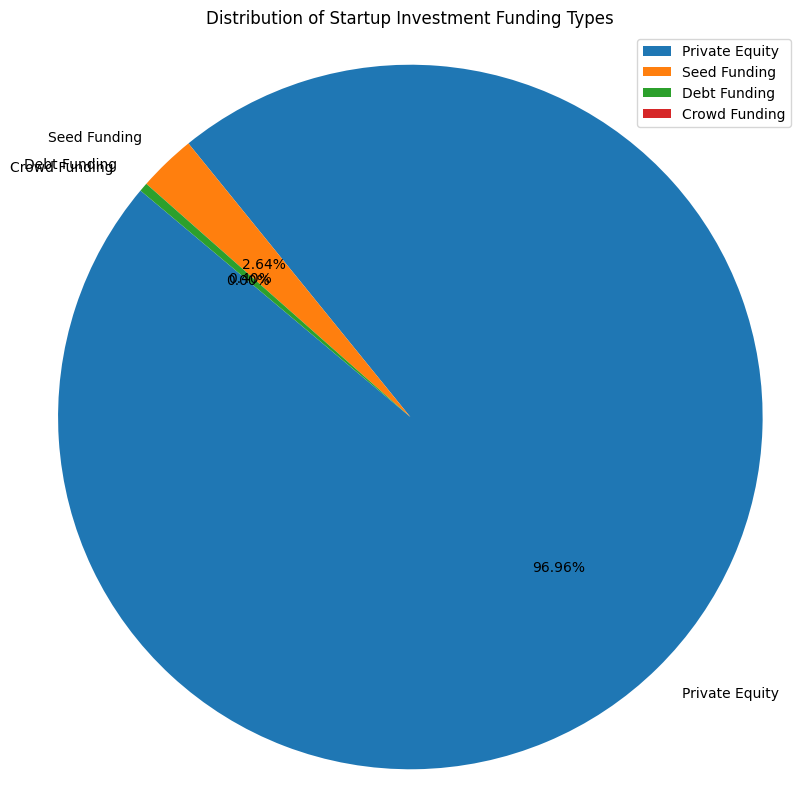

In [ ]:
all_investment_types = ['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding']
all_percentages = [77.13, 2.10, 0.32, 0.00]
investment_data = list(zip(all_investment_types, all_percentages))

# Sort the investment data based on percentage in descending order
sorted_investment_data = sorted(investment_data, key=lambda x: x[1], reverse=True)

# Print the sorted investment types and percentages
print("Investment Types and Percentages:")
for investment_type, percentage in sorted_investment_data:
    print(f"{investment_type}: {percentage:.2f}%")

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(all_percentages, labels=all_investment_types, autopct='%.2f%%', startangle=140)
plt.title('Distribution of Startup Investment Funding Types')
plt.axis('equal')
plt.legend()
# Display the pie chart
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3936 entries, 0 to 2872
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3936 non-null   object        
 1   Date dd/mm/yyyy    3934 non-null   datetime64[ns]
 2   Startup Name       3936 non-null   object        
 3   Industry Vertical  3936 non-null   object        
 4   SubVertical        3936 non-null   object        
 5   City  Location     3936 non-null   object        
 6   Investors Name     3936 non-null   object        
 7   InvestmentnType    3936 non-null   object        
 8   Amount in USD      3936 non-null   float64       
 9   year               3930 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 338.2+ KB


Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

In [ ]:
df['Industry Vertical'] = df['Industry Vertical'].str.replace('E-Commerce', 'Ecommerce')

In [ ]:
industry_total_funding = {}
total_funding = sum(df['Amount in USD'])

for industry, funding in zip(df['Industry Vertical'], df['Amount in USD']):
    industry_total_funding[industry] = funding

# Sort industries based on total funding in descending order
sorted_industries = sorted(industry_total_funding.items(), key=lambda x: x[1], reverse=True)

# Select the top 5 industries and calculate their percentages
top_5_industries = sorted_industries[:5]
top_5_percentages = [(industry, (funding / total_funding) * 100) for industry, funding in top_5_industries]

# Print the top 5 industries and their percentages
print("Top 5 Industries and Percentages:")
for industry, percentage in top_5_percentages:
    print(f"{industry}: {percentage:.2f}%")

Top 5 Industries and Percentages:
Online Marketplace: 0.97%
Ecommerce & M-Commerce platform: 0.94%
Car Aggregator & Retail Mobile App: 0.69%
Ecommerce Marketplace: 0.69%
Cab Aggregator: 0.55%


Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.

In [ ]:
# Create a dictionary to store total funding for each startup
startup_total_funding = {}
for name, funding in zip(df['Startup Name'], df['Amount in USD']):
    startup_total_funding[name] = funding

# Sort startups based on total funding in descending order
sorted_startups = sorted(startup_total_funding.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 startups with most amount of funding
print("Top 5 Startups by Total Funding:")
for startup, funding in sorted_startups[:5]:
    print(f"{startup}: ${funding:,}")

Top 5 Startups by Total Funding:
Rapido bike taxi: $3,900,000,000.0
Paytm: $680,000,000.0
True north: $600,000,000.0
Ola: $500,000,000.0
Snapdeal: $500,000,000.0


Find the top 5 startups who received the most number of funding rounds. That means, startups which got
fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.


In [ ]:
# Create a dictionary to store the number of investors for each startup
startup_investor_count = {}
for name, investors in zip(df['Startup Name'], df['InvestmentnType']):
    startup_investor_count[name] = len(investors)

# Sort startups based on the number of investors in descending order
sorted_startups = sorted(startup_investor_count.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 startups with most number of investors
print("Top 5 Startups by Number of Investors:")
for startup, investor_count in sorted_startups[:5]:
    print(f"{startup}: {investor_count} investors")

Top 5 Startups by Number of Investors:
Saahas zero waste: 24 investors
Rao iit academy: 23 investors
Byju’s: 21 investors
Shuttl: 21 investors
Mamaearth: 21 investors
